This submission will eventually become your Introduction/Business Problem section in your final report. So I recommend that you push the report (having your Introduction/Business Problem section only for now) to your Github repository and submit a link to it.

* Where is the best place to open a restaurant in London Ontario? Where are the most reviewed and what seems to be the most popular. And also ehat type of restaurant is more popular? This problem will be solved by using Foursquare API (view user count and tip count, etc.). This question will help everyone who wants to open a restaurant in London Ontario and wants to know if this is feasible.

Describe the data that you will be using to solve the problem or execute your idea. Remember that you will need to use the Foursquare location data to solve the problem or execute your idea. You can absolutely use other datasets in combination with the Foursquare location data. So make sure that you provide adequate explanation and discussion, with examples, of the data that you will be using, even if it is only Foursquare location data.

In [1]:
!pip install geocoder

     |████████████████████████████████| 98 kB 6.6 MB/s eta 0:00:011


In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: \ 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                          \                                   -failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - cffi -> python[version='2.7.*|3.5.*|3.6.*|3.6.9|3.6.9|3.6.9|3.6.9|>=3.6,<3.7.0a0|>=3.7,<3.8.0a0|>=3.9,<3.10.0a0|>=3.8,<3.9.0a0|>=2.7,<2.8.0a0|>=3.5,<3.6.0a0|3.4.*',build='0_73_pypy|1_73_pypy|3_73_pypy|2_73_pypy']
  - rsa -> python[version='2.7.*|3.4.*|3.5.*|3.6.*']

Your python: python=3.7

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the right, that ind

ModuleNotFoundError: No module named 'folium'

In [3]:
address = 'London , Ontario'

geolocator = Nominatim(user_agent="LNON_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London Ontario is {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London Ontario is 42.9836747, -81.2496068.


In [4]:

# Set up Foursquare
CLIENT_ID = 'G0XWNCZRXQ1FQW31X12IGCE4PXZOA3HURG2L1WSQGJFXPYHU' # your Foursquare ID
CLIENT_SECRET = 'W42QEEFCFIOYZUETK0ME3VPJMUE44UMWYBFDZBICVRVVQP1F' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: G0XWNCZRXQ1FQW31X12IGCE4PXZOA3HURG2L1WSQGJFXPYHU
CLIENT_SECRET:W42QEEFCFIOYZUETK0ME3VPJMUE44UMWYBFDZBICVRVVQP1F


In [5]:
search_query = 'Restaurant'
radius = 50000
print(search_query + ' .... OK!')

Restaurant .... OK!


In [6]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=G0XWNCZRXQ1FQW31X12IGCE4PXZOA3HURG2L1WSQGJFXPYHU&client_secret=W42QEEFCFIOYZUETK0ME3VPJMUE44UMWYBFDZBICVRVVQP1F&ll=42.9836747,-81.2496068&v=20180605&query=Restaurant&radius=50000&limit=100'

In [7]:

results = requests.get(url).json()

In [8]:

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,venuePage.id,location.neighborhood
0,4b97329ff964a520cbfb34e3,Thaifoon Restaurant,"[{'id': '4bf58dd8d48988d149941735', 'name': 'T...",v-1607638429,False,120 Dundas St.,near Talbot St.,42.983311,-81.251357,"[{'label': 'display', 'lat': 42.98331116257564...",148,N6A 1G3,CA,London,ON,Canada,"[120 Dundas St. (near Talbot St.), London ON N...",62339564,NaN
1,4b61ce40f964a520fa232ae3,Tahinis Restaurant,"[{'id': '4bf58dd8d48988d115941735', 'name': 'M...",v-1607638429,False,11-551 Richmond St,at Albert St.,42.988600,-81.250732,"[{'label': 'display', 'lat': 42.9885998, 'lng'...",555,N6A 3E9,CA,London,ON,Canada,"[11-551 Richmond St (at Albert St.), London ON...",561310659,NaN
2,4e74e1fb8998ed82a43fcaf0,Melody Restaurant,"[{'id': '4bf58dd8d48988d147941735', 'name': 'D...",v-1607638429,False,NaN,NaN,42.983746,-81.249484,"[{'label': 'display', 'lat': 42.983746, 'lng':...",12,NaN,CA,London,ON,Canada,"[London ON, Canada]",NaN,NaN
3,4b5e63e5f964a520ba8c29e3,Symposium Cafe Restaurant & Lounge,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",v-1607638429,False,620 Richmond St.,at Central Ave.,42.990655,-81.250828,"[{'label': 'display', 'lat': 42.990655149613, ...",783,N6J 5A9,CA,London,ON,Canada,"[620 Richmond St. (at Central Ave.), London ON...",146445443,NaN
4,4bf532dd706e20a1e222aa98,Westside Family Restaurant,"[{'id': '4bf58dd8d48988d143941735', 'name': 'B...",v-1607638429,False,107 Mount Pleasant Ave,Wharncliffe Rd. N.,42.984838,-81.263275,"[{'label': 'display', 'lat': 42.98483774629121...",1120,N6H 1E1,CA,London,ON,Canada,"[107 Mount Pleasant Ave (Wharncliffe Rd. N.), ...",NaN,NaN


In [9]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.head()


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,Thaifoon Restaurant,Thai Restaurant,120 Dundas St.,near Talbot St.,42.983311,-81.251357,"[{'label': 'display', 'lat': 42.98331116257564...",148,N6A 1G3,CA,London,ON,Canada,"[120 Dundas St. (near Talbot St.), London ON N...",NaN,4b97329ff964a520cbfb34e3
1,Tahinis Restaurant,Middle Eastern Restaurant,11-551 Richmond St,at Albert St.,42.988600,-81.250732,"[{'label': 'display', 'lat': 42.9885998, 'lng'...",555,N6A 3E9,CA,London,ON,Canada,"[11-551 Richmond St (at Albert St.), London ON...",NaN,4b61ce40f964a520fa232ae3
2,Melody Restaurant,Diner,NaN,NaN,42.983746,-81.249484,"[{'label': 'display', 'lat': 42.983746, 'lng':...",12,NaN,CA,London,ON,Canada,"[London ON, Canada]",NaN,4e74e1fb8998ed82a43fcaf0
3,Symposium Cafe Restaurant & Lounge,Restaurant,620 Richmond St.,at Central Ave.,42.990655,-81.250828,"[{'label': 'display', 'lat': 42.990655149613, ...",783,N6J 5A9,CA,London,ON,Canada,"[620 Richmond St. (at Central Ave.), London ON...",NaN,4b5e63e5f964a520ba8c29e3
4,Westside Family Restaurant,Breakfast Spot,107 Mount Pleasant Ave,Wharncliffe Rd. N.,42.984838,-81.263275,"[{'label': 'display', 'lat': 42.98483774629121...",1120,N6H 1E1,CA,London,ON,Canada,"[107 Mount Pleasant Ave (Wharncliffe Rd. N.), ...",NaN,4bf532dd706e20a1e222aa98


In [10]:
!pip install folium

     |████████████████████████████████| 93 kB 2.7 MB/s eta 0:00:011


In [11]:
import folium

In [12]:

venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) 


folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='London Ontario',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)


for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

Clustering

In [13]:
# The code was removed by Watson Studio for sharing.

,Place,Code,Country,Admin1,Admin2,Admin3,latitude,Longitude
0,1,London (West Huron Heights / Carling),N5Y,Canada,Ontario,London,43.012,-81.231
1,2,London (Glen Cairn),N5Z,Canada,Ontario,London,42.966,-81.205
2,3,London (East Tempo),N6L,Canada,Ontario,London,42.872,-81.247
3,4,London East (SW Argyle / Hamilton Road),N5W,Canada,Ontario,London,42.986,-81.182
4,5,London West (Central Hyde Park / Oakridge),N6H,Canada,Ontario,London,42.991,-81.340


In [14]:


def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [15]:
london_venues = getNearbyVenues(names=df_data_3['Code'],
                                   latitudes=df_data_3['latitude'],
                                   longitudes=df_data_3['Longitude']
                                  )

London (West Huron Heights / Carling)
London (Glen Cairn)
London (East Tempo)
London East (SW Argyle / Hamilton Road)
London West (Central Hyde Park / Oakridge)
London (Southcrest / East Westmount / West Highland)
London (Jackson / Old Victoria / Bradley / North Highbury)
London (YXU / North and East Argyle / East Huron Heights)
London (Fanshawe / Stoneybrook / Stoney Creek / Uplands / East Masonville)
London South (East Highland / North White Oaks / North Westminster)
London (South White Oaks / Central Westminster / East Longwoods / West Brockley)
London (Sunningdale / West Masonville / Medway / NE Hyde Park / East Fox Hollow)
London (Riverbend / Woodhull / North Sharon Creek / Byron / West Westmount)
London (South Highbury / Glanworth / East Brockley / SE Westminster)
London (Talbot / Lambeth / West Tempo / South Sharon Creek)
London Central
London North (UWO)


In [16]:
london_venues.to_csv('london_venues.csv')
london_venues = pd.read_csv('london_venues.csv')
london_venues

,Unnamed: 0,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,London (West Huron Heights / Carling),43.012,-81.231,Merla-Mae Ice Cream,43.010014,-81.241613,Ice Cream Shop
1,1,London (West Huron Heights / Carling),43.012,-81.231,Jumbo Video,43.011495,-81.241666,Video Store
2,2,London (West Huron Heights / Carling),43.012,-81.231,Metro,43.007334,-81.239668,Supermarket
3,3,London (West Huron Heights / Carling),43.012,-81.231,Pho Lee,43.006657,-81.239302,Thai Restaurant
4,4,London (West Huron Heights / Carling),43.012,-81.231,LCBO,43.003487,-81.227467,Liquor Store
5,5,London (West Huron Heights / Carling),43.012,-81.231,Cora's,43.006783,-81.239025,Breakfast Spot
6,6,London (West Huron Heights / Carling),43.012,-81.231,The Beer Store,43.010916,-81.241374,Beer Store
7,7,London (West Huron Heights / Carling),43.012,-81.231,RBC Royal Bank,43.011931,-81.241519,Bank
8,8,London (West Huron Heights / Carling),43.012,-81.231,Shoppers Drug Mart,43.012133,-81.243292,Pharmacy
9,9,London (West Huron Heights / Carling),43.012,-81.231,Subway,43.007322,-81.238760,Sandwich Place


In [17]:
londonCt = london_venues.groupby('Venue Category').size().reset_index(name='counts')
londonCt.sort_values(by=['counts'], ascending=False).head(10)

,Venue Category,counts
18,Coffee Shop,12
65,Sandwich Place,8
31,Grocery Store,7
7,Bar,6
59,Pizza Place,6
58,Pharmacy,6
63,Restaurant,6
56,Park,6
20,Convenience Store,6
37,Hotel,6


In [18]:
# one hot encoding
london_onehot = pd.get_dummies(london_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
london_onehot['Neighborhood'] = london_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [london_onehot.columns[-1]] + list(london_onehot.columns[:-1])
london_onehot = london_onehot[fixed_columns]

london_onehot.head()

,Neighborhood,African Restaurant,American Restaurant,Asian Restaurant,Automotive Shop,Baby Store,Bakery,Bank,Bar,Beer Store,Bookstore,Breakfast Spot,Brewery,Burrito Place,Business Service,Café,Chinese Restaurant,Church,Clothing Store,Coffee Shop,Construction & Landscaping,Convenience Store,Department Store,Dessert Shop,Discount Store,Event Space,Farmers Market,Fast Food Restaurant,French Restaurant,Gas Station,Gastropub,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Historic Site,History Museum,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Laser Tag,Liquor Store,Market,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Music Store,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pizza Place,Portuguese Restaurant,Pub,Record Shop,Restaurant,Salon / Barbershop,Sandwich Place,Skating Rink,Soccer Stadium,Soup Place,Spa,Sporting Goods Shop,Sports Bar,Supermarket,Sushi Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Vineyard,Wine Bar,Yoga Studio
0,London (West Huron Heights / Carling),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,London (West Huron Heights / Carling),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,London (West Huron Heights / Carling),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,London (West Huron Heights / Carling),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,London (West Huron Heights / Carling),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
london_grouped = london_onehot.groupby('Neighborhood').mean().reset_index()
london_grouped

,Neighborhood,African Restaurant,American Restaurant,Asian Restaurant,Automotive Shop,Baby Store,Bakery,Bank,Bar,Beer Store,Bookstore,Breakfast Spot,Brewery,Burrito Place,Business Service,Café,Chinese Restaurant,Church,Clothing Store,Coffee Shop,Construction & Landscaping,Convenience Store,Department Store,Dessert Shop,Discount Store,Event Space,Farmers Market,Fast Food Restaurant,French Restaurant,Gas Station,Gastropub,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Historic Site,History Museum,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Laser Tag,Liquor Store,Market,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Music Store,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pizza Place,Portuguese Restaurant,Pub,Record Shop,Restaurant,Salon / Barbershop,Sandwich Place,Skating Rink,Soccer Stadium,Soup Place,Spa,Sporting Goods Shop,Sports Bar,Supermarket,Sushi Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Vineyard,Wine Bar,Yoga Studio
0,London (East Tempo),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000
1,London (Fanshawe / Stoneybrook / Stoney Creek ...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.25,0.000000,0.00,0.000000,0.00,0.000000,0.000000
2,London (Glen Cairn),0.000000,0.066667,0.000000,0.000000,0.000000,0.066667,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.066667,0.00,0.000000,0.066667,0.00,0.000000,0.066667,0.000000,0.066667,0.000000,0.000000,0.066667,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.066667,0.066667,0.0,0.000000,0.000000,0.000000,0.066667,0.000000,0.066667,0.00,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000
3,London (Riverbend / Woodhull / North Sharon Cr...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.153846,0.000000,0.000000,0.076923,0.000000,0.153846,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.00,0.000000,0.

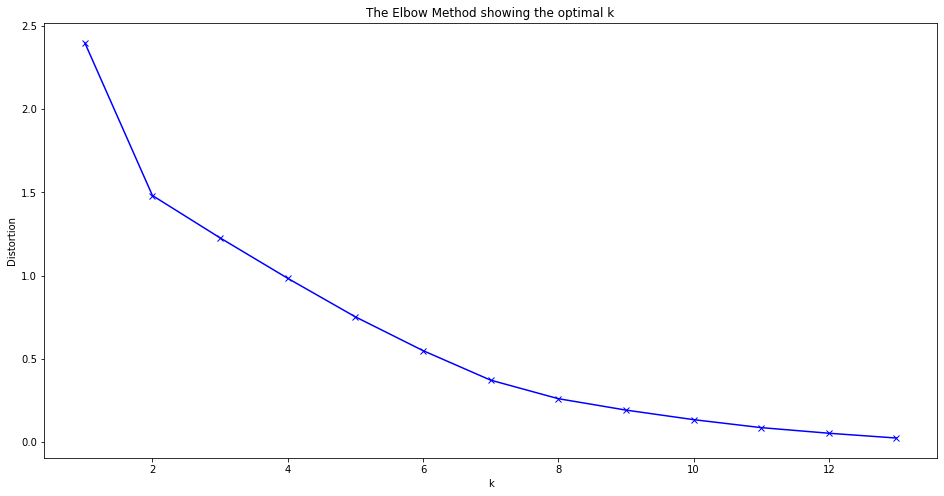

In [20]:
# set number of clusters
%matplotlib inline
import matplotlib.pyplot as plt

london_grouped_clustering = london_grouped.drop('Neighborhood', 1)
distortions = []
K = range(1,14)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(london_grouped_clustering)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


# run k-means clustering
#kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_grouped_clustering)

# check cluster labels generated for each row in the dataframe
#kmeans.labels_[0:10] 

In [21]:
# run k-means clustering
kmeans = KMeans(n_clusters=8,random_state=0).fit(london_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:14] 

array([1, 5, 0, 0, 7, 6, 0, 0, 4, 0, 3, 0, 0, 2], dtype=int32)

In [22]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 8

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = london_grouped['Neighborhood']

for ind in np.arange(london_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(london_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
0,London (East Tempo),Construction & Landscaping,Yoga Studio,Department Store,Discount Store,Event Space,Farmers Market,Fast Food Restaurant,French Restaurant
1,London (Fanshawe / Stoneybrook / Stoney Creek ...,Breakfast Spot,Trail,Park,Gas Station,Yoga Studio,Discount Store,Event Space,Farmers Market
2,London (Glen Cairn),Massage Studio,Grocery Store,Discount Store,Convenience Store,Salon / Barbershop,Coffee Shop,Skating Rink,Fast Food Restaurant
3,London (Riverbend / Woodhull / North Sharon Cr...,Convenience Store,Chinese Restaurant,Restaurant,Liquor Store,Pharmacy,Coffee Shop,Park,Supermarket
4,London (South White Oaks / Central Westminster...,Intersection,American Restaurant,Hotel,Department Store,Golf Course,Discount Store,Event Space,Farmers Market


In [108]:
#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [36]:
# add clustering labels
#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

london_merged=df_data_3

london_merged = london_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Code')
london_merged = london_merged.rename(columns={'Code': 'Neighbourhood', 'Country': 'Postal Code'})
london_merged["Cluster Labels"] = london_merged["Cluster Labels"].fillna(0.0).astype(int)
london_merged.dropna(subset = ["1st Most Common Venue"], inplace=True)
london_merged.head(15) # check the last columns!


,Place,Neighbourhood,Postal Code,Admin1,Admin2,Admin3,latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
0,1,London (West Huron Heights / Carling),N5Y,Canada,Ontario,London,43.012,-81.231,0,Video Store,Grocery Store,Pizza Place,Beer Store,Bookstore,Restaurant,Chinese Restaurant,Sandwich Place
1,2,London (Glen Cairn),N5Z,Canada,Ontario,London,42.966,-81.205,0,Massage Studio,Grocery Store,Discount Store,Convenience Store,Salon / Barbershop,Coffee Shop,Skating Rink,Fast Food Restaurant
2,3,London (East Tempo),N6L,Canada,Ontario,London,42.872,-81.247,1,Construction & Landscaping,Yoga Studio,Department Store,Discount Store,Event Space,Farmers Market,Fast Food Restaurant,French Restaurant
3,4,London East (SW Argyle / Hamilton Road),N5W,Canada,Ontario,London,42.986,-81.182,3,Portuguese Restaurant,Construction & Landscaping,Park,Business Service,Music Store,Yoga Studio,Gastropub,Farmers Market
4,5,London West (Central Hyde Park / Oakridge),N6H,Canada,Ontario,London,42.991,-81.340,2,Vineyard,Event Space,Market,Hardware Store,Yoga Studio,Golf Course,Discount Store,Farmers Market
5,6,London (Southcrest / East Westmount / West Hig...,N6J,Canada,Ontario,London,42.955,-81.273,6,Grocery Store,Ice Cream Shop,Bank,Park,Sporting Goods Shop,Gas Station,Business Service,Gastropub
7,8,London (YXU / North and East Argyle / East Hur...,N5V,Canada,Ontario,London,43.023,-81.164,4,Golf Course,Coffee Shop,Soccer Stadium,Historic Site,Yoga Studio,Discount Store,Event Space,Farmers Market
8,9,London (Fanshawe / Stoneybrook / Stoney Creek ...,N5X,Canada,Ontario,London,43.044,-81.239,5,Breakfast Spot,Trail,Park,Gas Station,Yoga Studio,Discount Store,Event Space,Farmers Market
9,10,London South (East Highland / North White Oaks...,N6C,Canada,Ontario,London,42.958,-81.238,0,Coffee Shop,American Restaurant,Middle Eastern Restaurant,Chinese Restaurant,Sandwich Place,Restaurant,Pizza Place,Pharmacy
10,11,London (South White Oaks / Central Westminster...,N6E,Canada,Ontario,London,42.918,-81.224,7,Intersection,American Restaurant,Hotel,Department Store,Golf Course,Discount Store,Event Space,Farmers Market


In [24]:
kclusters = 8
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_merged['latitude'], london_merged['Longitude'], london_merged['Neighbourhood'], london_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [25]:
london_merged.loc[london_merged['Cluster Labels'] == 0, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]

,Neighbourhood,Admin3,latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
0,London (West Huron Heights / Carling),London,43.012,-81.231,0,Video Store,Grocery Store,Pizza Place,Beer Store,Bookstore,Restaurant,Chinese Restaurant,Sandwich Place
1,London (Glen Cairn),London,42.966,-81.205,0,Massage Studio,Grocery Store,Discount Store,Convenience Store,Salon / Barbershop,Coffee Shop,Skating Rink,Fast Food Restaurant
9,London South (East Highland / North White Oaks...,London,42.958,-81.238,0,Coffee Shop,American Restaurant,Middle Eastern Restaurant,Chinese Restaurant,Sandwich Place,Restaurant,Pizza Place,Pharmacy
11,London (Sunningdale / West Masonville / Medway...,London,43.015,-81.305,0,Pharmacy,Pizza Place,Vietnamese Restaurant,History Museum,Baby Store,Toy / Game Store,Salon / Barbershop,Coffee Shop
12,London (Riverbend / Woodhull / North Sharon Cr...,London,42.954,-81.342,0,Convenience Store,Chinese Restaurant,Restaurant,Liquor Store,Pharmacy,Coffee Shop,Park,Supermarket
15,London Central,London,42.984,-81.239,0,Bookstore,Hotel,Vegetarian / Vegan Restaurant,Café,Indian Restaurant,Pub,Italian Restaurant,Gym / Fitness Center
16,London North (UWO),London,42.998,-81.256,0,Bar,Sandwich Place,Coffee Shop,Yoga Studio,Restaurant,Breakfast Spot,Café,Irish Pub


In [26]:
london_merged.loc[london_merged['Cluster Labels'] == 1, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]

,Neighbourhood,Admin3,latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
2,London (East Tempo),London,42.872,-81.247,1,Construction & Landscaping,Yoga Studio,Department Store,Discount Store,Event Space,Farmers Market,Fast Food Restaurant,French Restaurant


In [27]:
london_merged.loc[london_merged['Cluster Labels'] == 2, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]

,Neighbourhood,Admin3,latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
4,London West (Central Hyde Park / Oakridge),London,42.991,-81.34,2,Vineyard,Event Space,Market,Hardware Store,Yoga Studio,Golf Course,Discount Store,Farmers Market


In [28]:
london_merged.loc[london_merged['Cluster Labels'] == 3, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]

,Neighbourhood,Admin3,latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
3,London East (SW Argyle / Hamilton Road),London,42.986,-81.182,3,Portuguese Restaurant,Construction & Landscaping,Park,Business Service,Music Store,Yoga Studio,Gastropub,Farmers Market


In [29]:
london_merged.loc[london_merged['Cluster Labels'] == 4, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]

,Neighbourhood,Admin3,latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
7,London (YXU / North and East Argyle / East Hur...,London,43.023,-81.164,4,Golf Course,Coffee Shop,Soccer Stadium,Historic Site,Yoga Studio,Discount Store,Event Space,Farmers Market


In [30]:
london_merged.loc[london_merged['Cluster Labels'] == 5, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]

,Neighbourhood,Admin3,latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
8,London (Fanshawe / Stoneybrook / Stoney Creek ...,London,43.044,-81.239,5,Breakfast Spot,Trail,Park,Gas Station,Yoga Studio,Discount Store,Event Space,Farmers Market


In [31]:
london_merged.loc[london_merged['Cluster Labels'] == 6, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]

,Neighbourhood,Admin3,latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
5,London (Southcrest / East Westmount / West Hig...,London,42.955,-81.273,6,Grocery Store,Ice Cream Shop,Bank,Park,Sporting Goods Shop,Gas Station,Business Service,Gastropub


In [32]:
london_merged.loc[london_merged['Cluster Labels'] == 7, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]

,Neighbourhood,Admin3,latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
10,London (South White Oaks / Central Westminster...,London,42.918,-81.224,7,Intersection,American Restaurant,Hotel,Department Store,Golf Course,Discount Store,Event Space,Farmers Market


reference
http://www.geonames.org/postalcode-search.html?q=london&country=CA&adminCode1=ON